In [1]:
# Regressão Lasso (L1) para Seleção de Features
# Code (Setup)	
library(glmnet)


library(MASS)


library(caret)


data(Boston)


set.seed(42)

Carregando pacotes exigidos: Matrix

Loaded glmnet 4.1-10

Carregando pacotes exigidos: ggplot2

Carregando pacotes exigidos: lattice



In [2]:
# Preparação
# 1. Criar a matriz de atributos (X) e o vetor alvo (y)

X <- model.matrix(medv ~ ., data = Boston)[, -1]


y <- Boston$medv


train_indices <- createDataPartition(y, p = 0.7, list = FALSE)


X_treino <- X[train_indices, ]


y_treino <- y[train_indices]


X_teste <- X[-train_indices, ]


y_teste <- y[-train_indices]

In [3]:
# 1. Treinamento com Validação Cruzada (alpha=1 para Lasso)

cv_lasso <- cv.glmnet(X_treino, y_treino, alpha = 1, nfolds = 10)

In [4]:
# 2. Coeficientes no Lambda ideal (Observar os zeros!)


lambda_min <- cv_lasso$lambda.min


coeficientes_lasso <- coef(cv_lasso, s = lambda_min)


print(coeficientes_lasso)


cat("Lambda Mínimo (L1):", lambda_min, "\n")

14 x 1 sparse Matrix of class "dgCMatrix"
            s=0.005975135
(Intercept)   10.83839062
crim          -0.09406274
zn             0.02881598
indus          0.02026406
chas           2.46288953
nox           -9.03193395
rm             6.30667892
age           -0.02659377
dis           -1.24391021
rad            0.19693860
tax           -0.01332420
ptratio       -0.74624371
black          0.01240740
lstat         -0.31320659
Lambda Mínimo (L1): 0.005975135 


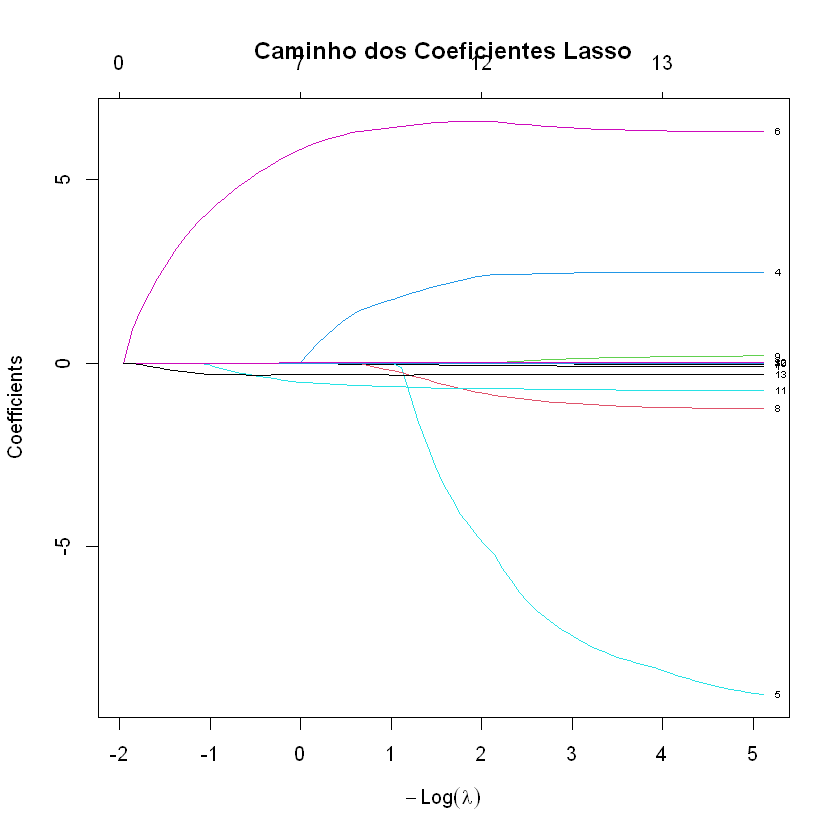

In [5]:
# 3. Visualizar o Caminho dos Coeficientes (Alguns zeram mais rápido que outros)


plot(
    cv_lasso$glmnet.fit, 
    xvar = "lambda", 
    label = TRUE, 
    main = "Caminho dos Coeficientes Lasso"
    )

In [ ]:
# 4. Previsão e Avaliação


previsoes_lasso <- predict(cv_lasso, s = lambda_min, newx = X_teste)


rmse_lasso <- sqrt(mean((previsoes_lasso - y_teste)^2))


cat("RMSE (Regressão Lasso):", round(rmse_lasso, 3), "\n")